### Mounting the Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Important Libraries and Modules:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Fake News using LSTM/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
# Get Independent features:
X = df.drop('label',axis = 1)

# Get Dependent features:
y = df['label']

In [ ]:
X.shape

(18285, 4)

In [ ]:
y.shape

(18285,)

### Before creating a Model:

#### Libraries for creating a deep learning model:

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
# Vocabulary Size:
voc_size = 5000

#### Data Preprocessing:

#### Libraries for Data Processing:

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
text = X.copy()

In [ ]:
text.reset_index(inplace = True)

In [ ]:
## Data Preprocessing:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []

for i in range(0,len(text)):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ', text['title'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

#### One Hot Encoding:

In [ ]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[322, 4406, 2718, 599, 4530, 4875, 1282, 3082, 4449, 3502],
 [1267, 486, 2182, 4055, 4809, 131, 4288],
 [3538, 98, 3589, 1651],
 [3869, 1975, 4039, 4514, 1819, 2464],
 [2574, 4809, 3624, 849, 3047, 3213, 4809, 194, 2914, 4645],
 [4028,
  2070,
  1312,
  2683,
  546,
  811,
  712,
  2278,
  1448,
  3158,
  4690,
  695,
  3988,
  3057,
  4288],
 [4597, 931, 2227, 3797, 3960, 623, 3105, 2383, 1808, 87, 1309],
 [4849, 4234, 4411, 4114, 1109, 1801, 811, 1648, 1808, 87, 1309],
 [4516, 488, 1316, 2950, 1944, 2385, 3327, 3446, 811, 3388],
 [441, 1804, 4720, 4999, 4250, 2814, 2154, 4230],
 [3778, 4524, 175, 2002, 247, 4457, 565, 1723, 1705, 56, 2314],
 [4514, 2140, 4530, 2385, 811, 1109],
 [4667, 4806, 2048, 1992, 3006, 1021, 2073, 3575, 4165],
 [3020, 1416, 3781, 2101, 597, 3750, 2129, 1808, 87, 1309],
 [665, 796, 2433, 2268, 1669, 1808, 87, 1309],
 [3536, 806, 2043, 4317, 4796, 63, 2562, 476, 3924, 1933],
 [1220, 512, 486],
 [3575, 4837, 4605, 4446, 811, 828, 3591, 4288],
 [19, 2367, 2182, 4

#### Embedding Representation:

In [ ]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 3082 4449 3502]
 [   0    0    0 ... 4809  131 4288]
 [   0    0    0 ...   98 3589 1651]
 ...
 [   0    0    0 ... 1808   87 1309]
 [   0    0    0 ...  611 1042 4559]
 [   0    0    0 ... 1521 1850  730]]


In [ ]:
len(embedded_docs)

18285

### LSTM Model Creation:

##### Initial Implementation of LSTM:

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model:
embedding_vector_features = 40
model1 = Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length = sent_length))
#model1.add(Dropout(0.3))
model1.add(LSTM(100)) # 100 Neurons
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='relu'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
X_final.shape, y_final.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state=42)

In [ ]:
history = model1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15, batch_size = 64)

Epoch 1/15
192/192 [==============================] - 8s 44ms/step - loss: 0.0651 - accuracy: 0.9958 - val_loss: 1.0151 - val_accuracy: 0.9137
Epoch 2/15
192/192 [==============================] - 8s 39ms/step - loss: 0.0655 - accuracy: 0.9958 - val_loss: 0.9944 - val_accuracy: 0.9128
Epoch 3/15
192/192 [==============================] - 8s 39ms/step - loss: 0.0659 - accuracy: 0.9956 - val_loss: 1.0339 - val_accuracy: 0.9137
Epoch 4/15
192/192 [==============================] - 7s 39ms/step - loss: 0.0676 - accuracy: 0.9950 - val_loss: 1.0082 - val_accuracy: 0.9150
Epoch 5/15
192/192 [==============================] - 8s 40ms/step - loss: 0.0708 - accuracy: 0.9946 - val_loss: 0.9990 - val_accuracy: 0.9167
Epoch 6/15
192/192 [==============================] - 8s 40ms/step - loss: 0.0737 - accuracy: 0.9940 - val_loss: 1.0328 - val_accuracy: 0.9147
Epoch 7/15
192/192 [==============================] - 8s 40ms/step - loss: 0.0979 - accuracy: 0.9888 - val_loss: 0.9733 - val_accuracy: 0.9123

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


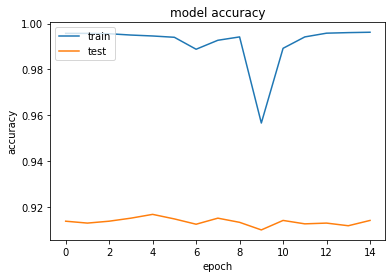

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

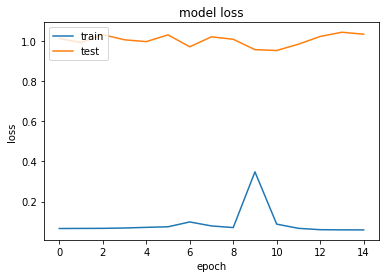

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Keras Tuner for Hyperparameter Tuning:

In [ ]:
pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 42.7 MB/s 


In [ ]:
from kerastuner.tuners import RandomSearch

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model:
embedding_vector_features = 40
model1 = Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length = sent_length))
#model1.add(Dropout(0.3))
model1.add(LSTM(100)) # 100 Neurons
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='relu'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
from tensorflow import keras
def build_model(hp):
  embedding_vector_features = 40
  model = keras.Sequential()
  model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_length))
  model.add(LSTM(hp.Choice('units', [32,128,256,384,512]), activation='tanh'))
  #model.add(LSTM(units=hp.Int('units', min_value = 32, max_value=512, step=128)))
  model.add(Dropout(rate = hp.Float('rate', min_value=0.1, max_value=0.5, step=0.1)))
  model.add(Dense(1,activation='relu'))
  model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Choice('learning_rate', values=[1e-2, 1e-4])),
          loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective ='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='fakeNewsClassfier')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Choice)
{'default': 32, 'conditions': [], 'values': [32, 128, 256, 384, 512], 'ordered': True}
rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Trial 5 Complete [01h 01m 16s]
val_accuracy: 0.9204087456067404

Best val_accuracy So Far: 0.9204087456067404
Total elapsed time: 02h 46m 11s


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/fakeNewsClassfier
Showing 10 best trials
Trial summary
Hyperparameters:
units: 512
rate: 0.30000000000000004
learning_rate: 0.0001
Score: 0.9204087456067404
Trial summary
Hyperparameters:
units: 256
rate: 0.2
learning_rate: 0.0001
Score: 0.9194697737693787
Trial summary
Hyperparameters:
units: 512
rate: 0.4
learning_rate: 0.0001
Score: 0.9188622037569681
Trial summary
Hyperparameters:
units: 256
rate: 0.4
learning_rate: 0.01
Score: 0.4334714114665985
Trial summary
Hyperparameters:
units: 128
rate: 0.2
learning_rate: 0.01
Score: 0.4334714114665985


#### After Keras Tuner, creating a hyperparametrized model:

In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(y)
X_final.shape, y_final.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state=42)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dropout
with tf.device('/gpu:0'):
  embedding_vector_features = 40
  model = Sequential()
  model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))
  model.add(LSTM(512, activation='tanh', return_sequences = True))
  model.add(Dropout(0.3))
  model.add(LSTM(512, activation='tanh'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='relu'))
  model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.summary()
  history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15, batch_size = 64, callbacks = [callback], verbose = 0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 20, 512)           1132544   
                                                                 
 dropout (Dropout)           (None, 20, 512)           0         
                                                                 
 lstm_1 (LSTM)               (None, 512)               2099200   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 3,432,257
Trainable params: 3,432,257
Non-

#### Performance Metrics:

In [ ]:
print(history.history['val_accuracy'] , "\n", history.history['val_loss'], "\n", history.history['accuracy'])

[0.7368682622909546, 0.7933719754219055, 0.8599834442138672, 0.8941176533699036, 0.9091963768005371, 0.9116818308830261, 0.9154929518699646, 0.9151615500450134, 0.9161557555198669, 0.9174813628196716] 
 [0.5470605492591858, 0.3932262361049652, 0.31503379344940186, 0.32408469915390015, 0.26296266913414, 0.29895782470703125, 0.25981131196022034, 0.2926056981086731, 0.2916845977306366, 0.30444225668907166] 
 [0.6709387898445129, 0.7885714173316956, 0.8634285926818848, 0.8955918550491333, 0.9214693903923035, 0.9135510325431824, 0.8948571681976318, 0.9381224513053894, 0.9462857246398926, 0.9427754878997803]


In [ ]:
 model.reset_states()

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


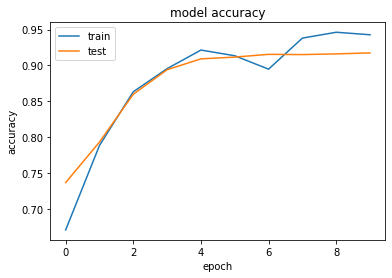

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

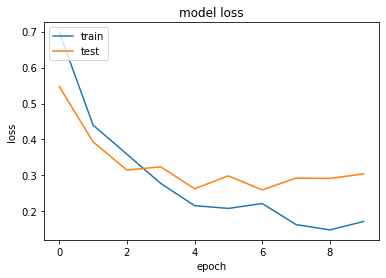

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = (model.predict(X_final) > 0.5).astype('int32')

572/572 [==============================] - 2s 4ms/step


In [ ]:
y_pred 

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
y_pred[0][0]

1

In [ ]:
y_predicted = []
for i in range(len(y_pred)):
  y_predicted.append(y_pred[i][0])

y_predicted = list(y_predicted)

In [ ]:
data = {"Text":list(X['text']), "Label":list(y),"Predicted Label":list(y_predicted)}
dataFramePrediction_LSTM = pd.DataFrame(data = data)
dataFramePrediction_LSTM.head()

,Text,Label,Predicted Label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,1
1,Ever get the feeling your life circles the rou...,0,0
2,"Why the Truth Might Get You Fired October 29, ...",1,1
3,Videos 15 Civilians Killed In Single US Airstr...,1,1
4,Print \nAn Iranian woman has been sentenced to...,1,1


In [ ]:
dataFramePrediction_LSTM.tail()

,Text,Label,Predicted Label
18280,Rapper T. I. unloaded on black celebrities who...,0,0
18281,When the Green Bay Packers lost to the Washing...,0,0
18282,The Macy’s of today grew from the union of sev...,0,0
18283,"NATO, Russia To Hold Parallel Exercises In Bal...",1,1
18284,"David Swanson is an author, activist, journa...",1,1


##### Confusion Matrix and its heatmap:

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_predicted)
# False Positive and False Negative is really less as compared to True Positive and True Negative

array([[9558,  803],
       [ 271, 7653]])

[[7653  271]
 [ 803 9558]]


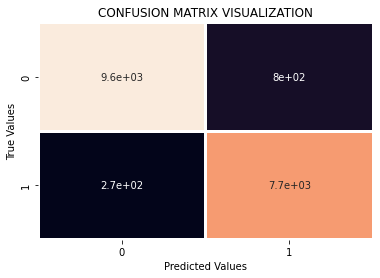

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_predicted,labels=[1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y, y_predicted),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

##### Accuracy Score:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9412633305988515

##### Classification Report:

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['Not Fake', 'Fake']

In [ ]:
print(classification_report(y, y_predicted, target_names=target_names))

              precision    recall  f1-score   support

    Not Fake       0.97      0.92      0.95     10361
        Fake       0.91      0.97      0.93      7924

    accuracy                           0.94     18285
   macro avg       0.94      0.94      0.94     18285
weighted avg       0.94      0.94      0.94     18285



##### f1 Score:

In [ ]:
from sklearn.metrics import f1_score
f1_score(y,y_predicted)

0.9344322344322343

##### AUC-ROC Curve:

189/189 [==============================] - 1s 4ms/step


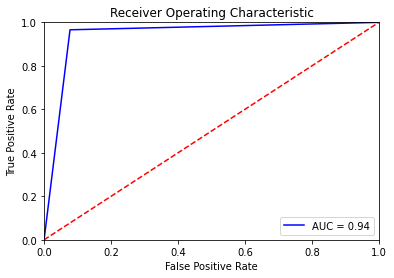

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X)
def predict_prob(number):
  return [number[0],1-number[0]]

y_prob = np.array(list(map(predict_prob, model.predict(X_test))))
y_prob

preds = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### MLP (Multilayer Perceptron):

#### Using sklearn's MLP Classifier:

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
classifier=MLPClassifier(
    hidden_layer_sizes=(6,5),
    activation='relu',
    random_state=762,
    solver='adam',
    learning_rate_init=0.01,
    verbose=10,
    max_iter=35)


In [ ]:
classifier.fit(X_train,y_train)

Iteration 1, loss = 9.55201134
Iteration 2, loss = 1.36882735
Iteration 3, loss = 0.86626946
Iteration 4, loss = 0.80665423
Iteration 5, loss = 0.70028084
Iteration 6, loss = 0.77102634
Iteration 7, loss = 0.69092057
Iteration 8, loss = 0.64234648
Iteration 9, loss = 0.63347152
Iteration 10, loss = 0.61898022
Iteration 11, loss = 0.63191653
Iteration 12, loss = 0.61285080
Iteration 13, loss = 0.62923590
Iteration 14, loss = 0.61847170
Iteration 15, loss = 0.59485636
Iteration 16, loss = 0.60529246
Iteration 17, loss = 0.62650788
Iteration 18, loss = 0.60331065
Iteration 19, loss = 0.63244543
Iteration 20, loss = 0.59733169
Iteration 21, loss = 0.57720722
Iteration 22, loss = 0.56911699
Iteration 23, loss = 0.56900509
Iteration 24, loss = 0.56315212
Iteration 25, loss = 0.55764630
Iteration 26, loss = 0.56355730
Iteration 27, loss = 0.55960340
Iteration 28, loss = 0.55005574
Iteration 29, loss = 0.55964522
Iteration 30, loss = 0.54518406
Iteration 31, loss = 0.54041367
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01, max_iter=35,
              random_state=762, verbose=10)

In [ ]:
y_mlp_pred=(classifier.predict(X_final) > 0.5).astype('int32')
score=np.round(accuracy_score(y,y_mlp_pred),2)
print("Accuracy : ",score*100,"%")

Accuracy :  70.0 %


In [ ]:
y_mlp_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

##### Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_mlp_pred)
# False Positive and False Negative is really less as compared to True Positive and True Negative

array([[5189, 5172],
       [ 339, 7585]])

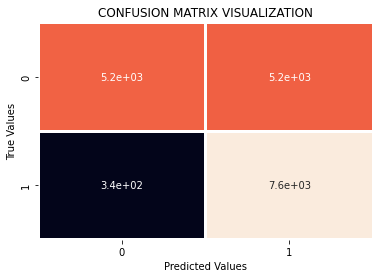

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y, y_mlp_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

##### Accuracy Score:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_mlp_pred)

0.698605414273995

##### Classification Report:

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Not Fake', 'Fake']
print(classification_report(y, y_mlp_pred, target_names=target_names))


              precision    recall  f1-score   support

    Not Fake       0.94      0.50      0.65     10361
        Fake       0.59      0.96      0.73      7924

    accuracy                           0.70     18285
   macro avg       0.77      0.73      0.69     18285
weighted avg       0.79      0.70      0.69     18285



##### f1 Score:

In [ ]:
from sklearn.metrics import f1_score
f1_score(y,y_mlp_pred)

0.7335235240075432

#### Using Sequential Model:

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.layers import Dropout
with tf.device('/gpu:0'):
  ## Creating model:
  embedding_vector_features = 40
  model_mlp = Sequential()
  # model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_length))
  model_mlp.add(Dense(256,input_shape=(20,), activation='relu'))  
  model_mlp.add(Dense(256, activation='relu'))
  model_mlp.add(Dense(256, activation='relu'))
  model_mlp.add(Dropout(0.3))
  model_mlp.add(Dense(1,activation='sigmoid'))
  model_mlp.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  model_mlp.summary()
  history = model_mlp.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 64)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               5376      
                                                                 
 dense_29 (Dense)            (None, 256)               65792     
                                                                 
 dense_30 (Dense)            (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 1)                 257       
                                                                 
Total params: 137,217
Trainable params: 137,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
192/192 [============================

##### Perfromance Metrics for MLP Sequential Model:

In [ ]:
print("Validation Accuracy: ",history.history['val_accuracy'] , "\n", "Validation Loss: ",history.history['val_loss'], "\n", "Accuracy: ",history.history['accuracy'])

Validation Accuracy:  [0.72013258934021, 0.7453189492225647, 0.7645401954650879, 0.7625517845153809, 0.7696768641471863, 0.7756420969963074, 0.775807797908783, 0.7819386720657349, 0.7849212884902954, 0.7902237176895142, 0.7839270830154419, 0.7648715972900391, 0.7890638113021851, 0.767688512802124, 0.7890638113021851, 0.7983430027961731, 0.8056337833404541, 0.8001657128334045, 0.8011599183082581, 0.8021541237831116] 
 Validation Loss:  [0.7423396110534668, 0.5152444243431091, 0.4837440252304077, 0.4961022436618805, 0.48256388306617737, 0.4543251097202301, 0.44500598311424255, 0.4407336115837097, 0.4398934543132782, 0.4388388991355896, 0.4411710798740387, 0.4503215551376343, 0.434310644865036, 0.5975192189216614, 0.4335608184337616, 0.4435108006000519, 0.44682711362838745, 0.44237443804740906, 0.4287303686141968, 0.4472152292728424] 
 Accuracy:  [0.6890612244606018, 0.7296326756477356, 0.752163290977478, 0.7584489583969116, 0.7669387459754944, 0.77159184217453, 0.7767347097396851, 0.7795

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


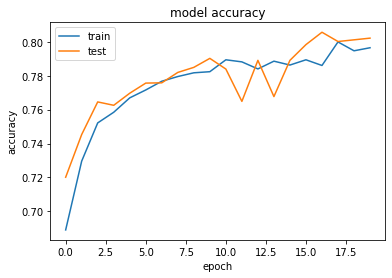

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

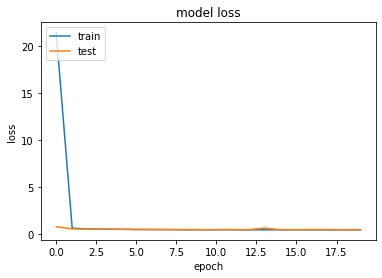

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = (model_mlp.predict(X_final) > 0.5).astype('int32')

572/572 [==============================] - 1s 2ms/step


In [ ]:
y_pred 

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
y_predicted_mlp = []
for i in range(len(y_pred)):
  y_predicted_mlp.append(y_pred[i][0])

y_predicted_mlp = list(y_predicted_mlp)

In [ ]:
data_mlp = {"Text":list(X['text']), "Label":list(y),"Predicted Label":list(y_predicted_mlp)}
dataFramePrediction_sequential_mlp = pd.DataFrame(data = data_mlp) 
dataFramePrediction_sequential_mlp.head()

,Text,Label,Predicted Label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,0
1,Ever get the feeling your life circles the rou...,0,0
2,"Why the Truth Might Get You Fired October 29, ...",1,1
3,Videos 15 Civilians Killed In Single US Airstr...,1,1
4,Print \nAn Iranian woman has been sentenced to...,1,0


In [ ]:
dataFramePrediction_sequential_mlp.tail()

,Text,Label,Predicted Label
18280,Rapper T. I. unloaded on black celebrities who...,0,1
18281,When the Green Bay Packers lost to the Washing...,0,0
18282,The Macy’s of today grew from the union of sev...,0,0
18283,"NATO, Russia To Hold Parallel Exercises In Bal...",1,1
18284,"David Swanson is an author, activist, journa...",1,1


##### Confusion Matrix and its heatmap:

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_predicted)
# False Positive and False Negative is really less as compared to True Positive and True Negative

array([[9558,  803],
       [ 271, 7653]])

[[7653  271]
 [ 803 9558]]


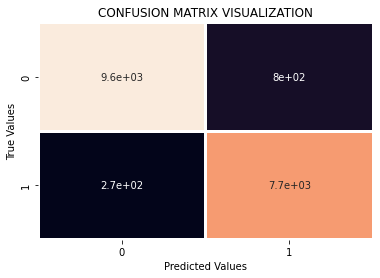

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_predicted,labels=[1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y, y_predicted),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

##### Accuracy Score:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.8129067541700847

##### Classification Report:

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['Not Fake', 'Fake']

In [ ]:
print(classification_report(y, y_predicted, target_names=target_names))

              precision    recall  f1-score   support

    Not Fake       0.97      0.92      0.95     10361
        Fake       0.91      0.97      0.93      7924

    accuracy                           0.94     18285
   macro avg       0.94      0.94      0.94     18285
weighted avg       0.94      0.94      0.94     18285



##### f1 Score:

In [ ]:
from sklearn.metrics import f1_score
f1_score(y,y_predicted)

0.9344322344322343

##### AUC-ROC Curve:

189/189 [==============================] - 0s 2ms/step


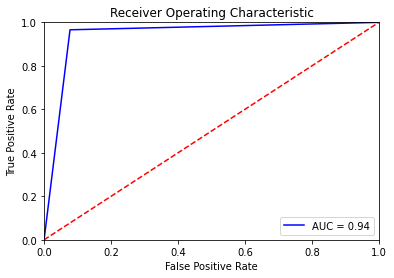

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X)
def predict_prob(number):
  return [number[0],1-number[0]]

y_prob = np.array(list(map(predict_prob, model.predict(X_test))))
y_prob

preds = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()